# Data Profiling of QVI_data csv

In [2]:
import pandas as pd  
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('../../raw_data/QVI_data.csv')
df.head(5)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [4]:
print(df.describe(include='all'))

        LYLTY_CARD_NBR        DATE      STORE_NBR        TXN_ID  \
count     2.648340e+05      264834  264834.000000  2.648340e+05   
unique             NaN         364            NaN           NaN   
top                NaN  2018-12-24            NaN           NaN   
freq               NaN         939            NaN           NaN   
mean      1.355488e+05         NaN     135.079423  1.351576e+05   
std       8.057990e+04         NaN      76.784063  7.813292e+04   
min       1.000000e+03         NaN       1.000000  1.000000e+00   
25%       7.002100e+04         NaN      70.000000  6.760050e+04   
50%       1.303570e+05         NaN     130.000000  1.351365e+05   
75%       2.030940e+05         NaN     203.000000  2.026998e+05   
max       2.373711e+06         NaN     272.000000  2.415841e+06   

             PROD_NBR                               PROD_NAME       PROD_QTY  \
count   264834.000000                                  264834  264834.000000   
unique            NaN              

## Additional Data Quality Inspections

1. Duplicate records

In [5]:
df.duplicated().sum()

np.int64(1)

In [6]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

2. Existance of 272 stores check

In [7]:
df['STORE_NBR'].nunique()

272

## Corrections

In [8]:
df['DATE'] = pd.to_datetime(df['DATE'])

# Exploratory Data Analysis

The client has selected store numbers 77, 86 and 88 as trial stores and wants control stores to be established stores that are operational for the entire observation period.

We would want to match trial stores to control stores that are similar to the trial store prior to the trial period of Feb 2019 in terms of :
- Monthly overall sales revenue
- Monthly number of customers
- Monthly number of transactions per customer

In [9]:
# extracting year-month 

df['YEAR_MONTH'] = df['DATE'].dt.to_period('M')

df.head(5)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEAR_MONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018-10
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018-09
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019-03
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,2019-03
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018-11


In [10]:
summary = (
    df.groupby(['STORE_NBR', 'YEAR_MONTH']).agg(
        SALES_REVENUE = ('TOT_SALES', 'sum'),
        CUSTOMER_COUNT = ('LYLTY_CARD_NBR', 'nunique'),
        TOTAL_TXN = ('TXN_ID', 'nunique')
    ).reset_index()
)

summary['TXN_PER_CUSTOMER'] = summary['TOTAL_TXN'] / summary['CUSTOMER_COUNT']

summary.head(10)

,STORE_NBR,YEAR_MONTH,SALES_REVENUE,CUSTOMER_COUNT,TOTAL_TXN,TXN_PER_CUSTOMER
0,1,2018-07,206.9,49,52,1.061224
1,1,2018-08,176.1,42,43,1.023810
2,1,2018-09,278.8,59,62,1.050847
3,1,2018-10,188.1,44,45,1.022727
4,1,2018-11,192.6,46,47,1.021739
5,1,2018-12,189.6,42,47,1.119048
6,1,2019-01,154.8,35,36,1.028571
7,1,2019-02,225.4,52,55,1.057692
8,1,2019-03,192.9,45,49,1.088889
9,1,2019-04,192.9,42,43,1.023810


In [11]:
pre_trial_data = summary[summary['YEAR_MONTH'] < '2019-02']

store_avg_data = pre_trial_data.groupby('STORE_NBR').agg(
    AVG_MONTHLY_SALES = ('SALES_REVENUE', 'mean'),
    AVG_CUSTOMER_FLOW = ('CUSTOMER_COUNT', 'mean'),
    AVG_TXN_PER_CUSTOMER = ('TXN_PER_CUSTOMER', 'mean')
).reset_index()

In [12]:
trial_stores = [77, 86, 88]

trial_store_data = store_avg_data[store_avg_data['STORE_NBR'].isin(trial_stores)]

control_store_candidates = store_avg_data[~store_avg_data['STORE_NBR'].isin(trial_stores)]

In [13]:
# months of trial

print(f"Date range of data is from {df['DATE'].min()} to {df['DATE'].max()}")

Date range of data is from 2018-07-01 00:00:00 to 2019-06-30 00:00:00


> The trial ran from February 2019 to June 2019. A total of 5 full months.

In [14]:
trial_store_data.head()

,STORE_NBR,AVG_MONTHLY_SALES,AVG_CUSTOMER_FLOW,AVG_TXN_PER_CUSTOMER
76,77,242.714286,42.714286,1.057898
85,86,874.264286,99.571429,1.256935
87,88,1340.514286,125.714286,1.217688


In [15]:
control_store_candidates.head(5)

,STORE_NBR,AVG_MONTHLY_SALES,AVG_CUSTOMER_FLOW,AVG_TXN_PER_CUSTOMER
0,1,198.128571,45.285714,1.046852
1,2,161.214286,38.857143,1.051386
2,3,1075.164286,106.285714,1.172833
3,4,1303.857143,121.285714,1.219322
4,5,819.957143,93.000000,1.255987


## Correlation Calculation

In [40]:
pre_trial_data.head()

,STORE_NBR,YEAR_MONTH,SALES_REVENUE,CUSTOMER_COUNT,TOTAL_TXN,TXN_PER_CUSTOMER
0,1,2018-07,206.9,49,52,1.061224
1,1,2018-08,176.1,42,43,1.023810
2,1,2018-09,278.8,59,62,1.050847
3,1,2018-10,188.1,44,45,1.022727
4,1,2018-11,192.6,46,47,1.021739


In [35]:
time_series_sales = pre_trial_data.pivot(
    index= 'STORE_NBR',
    columns= 'YEAR_MONTH',
    values= 'SALES_REVENUE'
)

time_series_customers = pre_trial_data.pivot(
    index='STORE_NBR',
    columns='YEAR_MONTH',
    values='CUSTOMER_COUNT'
)

time_series_txn = pre_trial_data.pivot(
    index='STORE_NBR',
    columns='YEAR_MONTH',
    values='TXN_PER_CUSTOMER'
)

In [18]:
def corr_calculation():

    results = {}

    for store in trial_stores:
        corr_sales = time_series_sales.T.corr()[store]
        corr_customers = time_series_customers.T.corr()[store]
        corr_txn = time_series_txn.T.corr()[store]

        avg_corr = (corr_sales + corr_customers + corr_txn) / 3

        avg_corr = avg_corr.drop(store) #removing correlation done with itself
        results[store] = avg_corr.sort_values(ascending=False)  # if printing only top 3 match    .head(3)

    return results

## Magnitude Distance Calculation

In [19]:
def mag_distance():

    results = {}

    metrics_df = store_avg_data[['STORE_NBR', 'AVG_MONTHLY_SALES', 'AVG_CUSTOMER_FLOW', 'AVG_TXN_PER_CUSTOMER']].set_index('STORE_NBR')

    scaler = StandardScaler()

    metrics_scaled = pd.DataFrame(
        scaler.fit_transform(metrics_df),
        index= metrics_df.index,
        columns= metrics_df.columns
    )

    for store in trial_stores:
        distances = ((metrics_scaled - metrics_scaled.loc[store]).abs()).sum(axis=1)

        distances = distances.drop(store)

        results[store] = distances  # if printing only top 3 match    .nsmallest(3)

    return results

## Finding Control Stores

In [20]:
result = corr_calculation() #if printing only top 3 best matches for each

result

{77: STORE_NBR
 119    0.884487
 162    0.679224
 3      0.671123
 17     0.671074
 84     0.646476
          ...   
 244         NaN
 252         NaN
 258         NaN
 263         NaN
 267         NaN
 Name: 77, Length: 270, dtype: float64,
 86: STORE_NBR
 138    0.684236
 22     0.677147
 240    0.670384
 176    0.653286
 114    0.605435
          ...   
 244         NaN
 252         NaN
 258         NaN
 263         NaN
 267         NaN
 Name: 86, Length: 270, dtype: float64,
 88: STORE_NBR
 178    0.668217
 113    0.638066
 201    0.570582
 106    0.549693
 187    0.538093
          ...   
 244         NaN
 252         NaN
 258         NaN
 263         NaN
 267         NaN
 Name: 88, Length: 270, dtype: float64}

In [21]:
result = mag_distance()

result

{77: STORE_NBR
 1      0.286636
 2      0.371302
 3      4.896484
 4      6.318078
 5      4.687426
          ...   
 268    0.117191
 269    5.559125
 270    5.833201
 271    4.537314
 272    0.682306
 Length: 270, dtype: float64,
 86: STORE_NBR
 1      5.158823
 2      5.380299
 3      1.488759
 4      2.025216
 5      0.321571
          ...   
 268    5.088185
 269    0.550128
 270    0.824204
 271    0.471683
 272    4.326692
 Length: 270, dtype: float64,
 88: STORE_NBR
 1      6.663127
 2      6.884604
 3      1.616818
 4      0.226328
 5      2.555060
          ...   
 268    6.592489
 269    2.034586
 270    2.375631
 271    2.378943
 272    5.830996
 Length: 270, dtype: float64}

> Implication -

This data implies the following:

- Some stores have similar trends but operate at different scales
- Some stores have similar scale but different trends


A good Control Store should:
1. Trend similarly with high correlation
2. Operate at similar scale with low magnitude distances


**This requires to now combine the two scores and finalize Control Stores.**

In [26]:
def combined_match():

    final_results = {}

    mag_results = mag_distance()

    corr_results = corr_calculation()

    for store in trial_stores:
        corr_series = corr_results[store]
        dist_series = mag_results[store]
        

        common = corr_series.index.intersection(dist_series.index)

        corr_series = corr_series.loc[common]
        dist_series = dist_series.loc[common]

        dist_similarity = 1 / (1 + dist_series)

        score = (corr_series + dist_similarity) / 2

        final_results[store] = score.sort_values(ascending=False).head(3)

    return final_results

In [27]:
control_stores = combined_match()

control_stores

{77: STORE_NBR
 17     0.674513
 233    0.658264
 167    0.657204
 dtype: float64,
 86: STORE_NBR
 138    0.753261
 13     0.688028
 225    0.676829
 dtype: float64,
 88: STORE_NBR
 237    0.594935
 201    0.508488
 203    0.497494
 dtype: float64}

**Control stores have been identified for each trial stores** (in descending order of acceptance):

Trial store 77 : {17, 233, 167}

Trial store 86 : {138, 13, 225} 

Trial store 88 : {237, 201, 203} - here all three stores for Trial store 88 have low scores of acceptance


## Validation of Control Stores 

In [30]:
import matplotlib.pyplot as plt

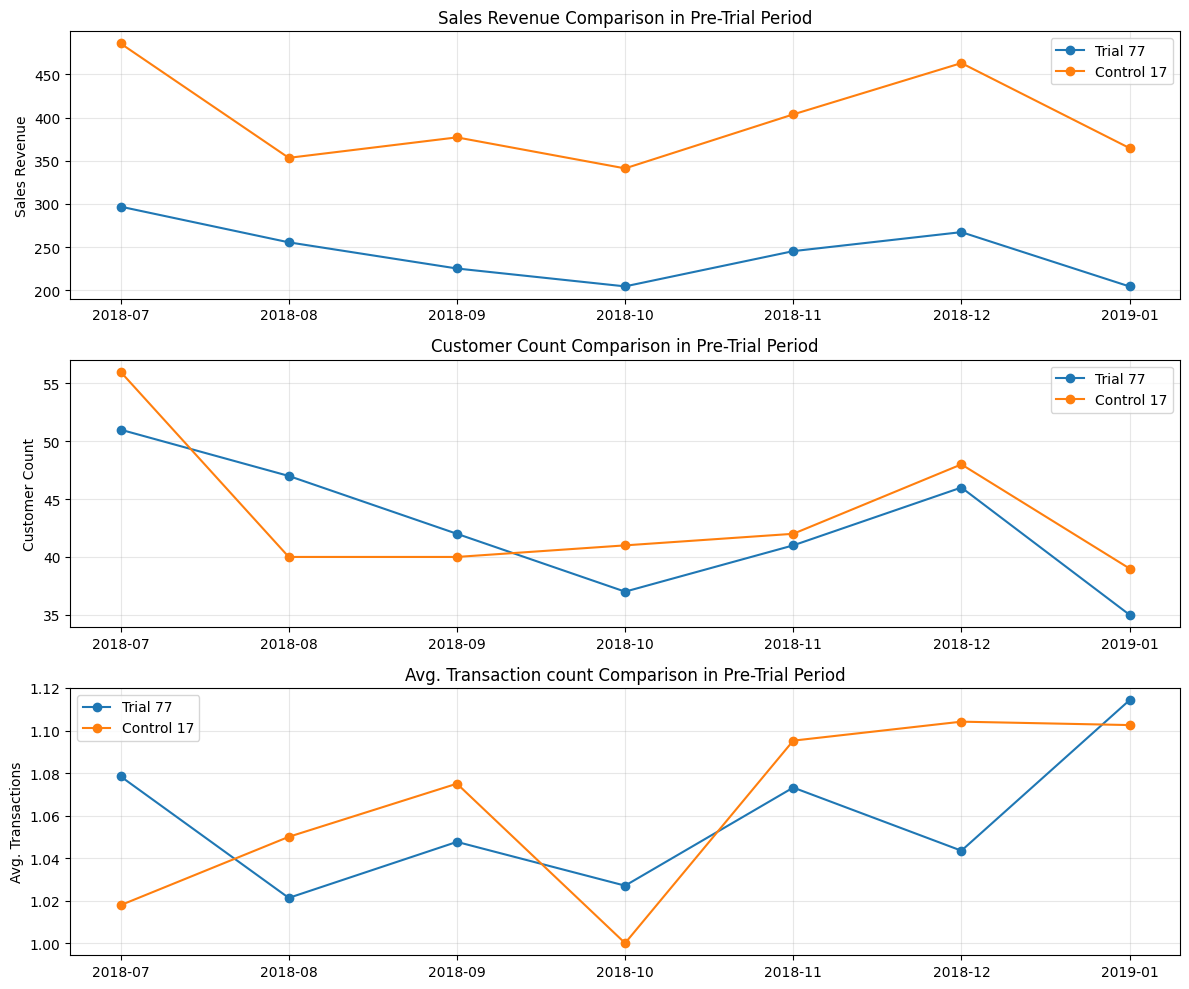

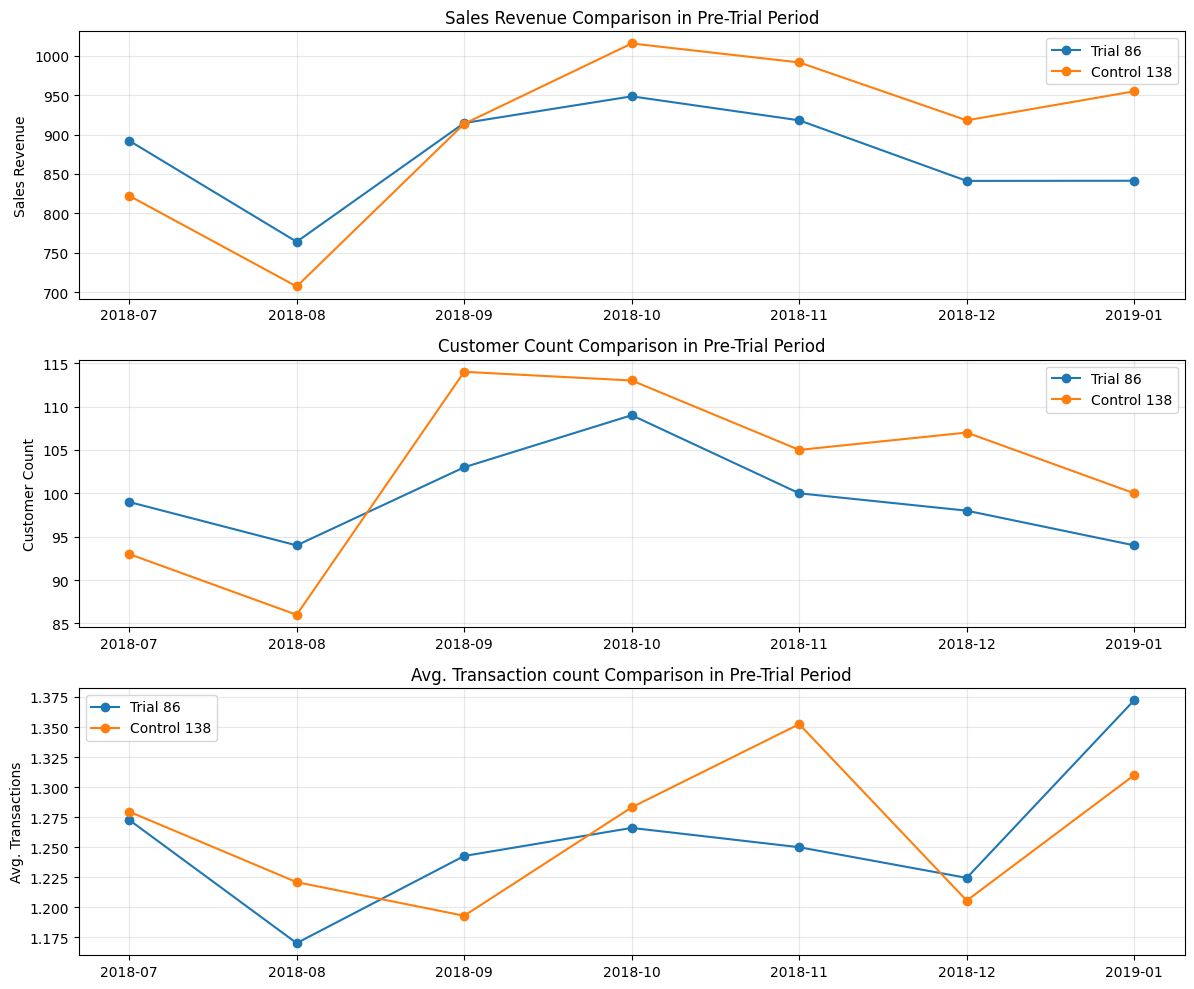

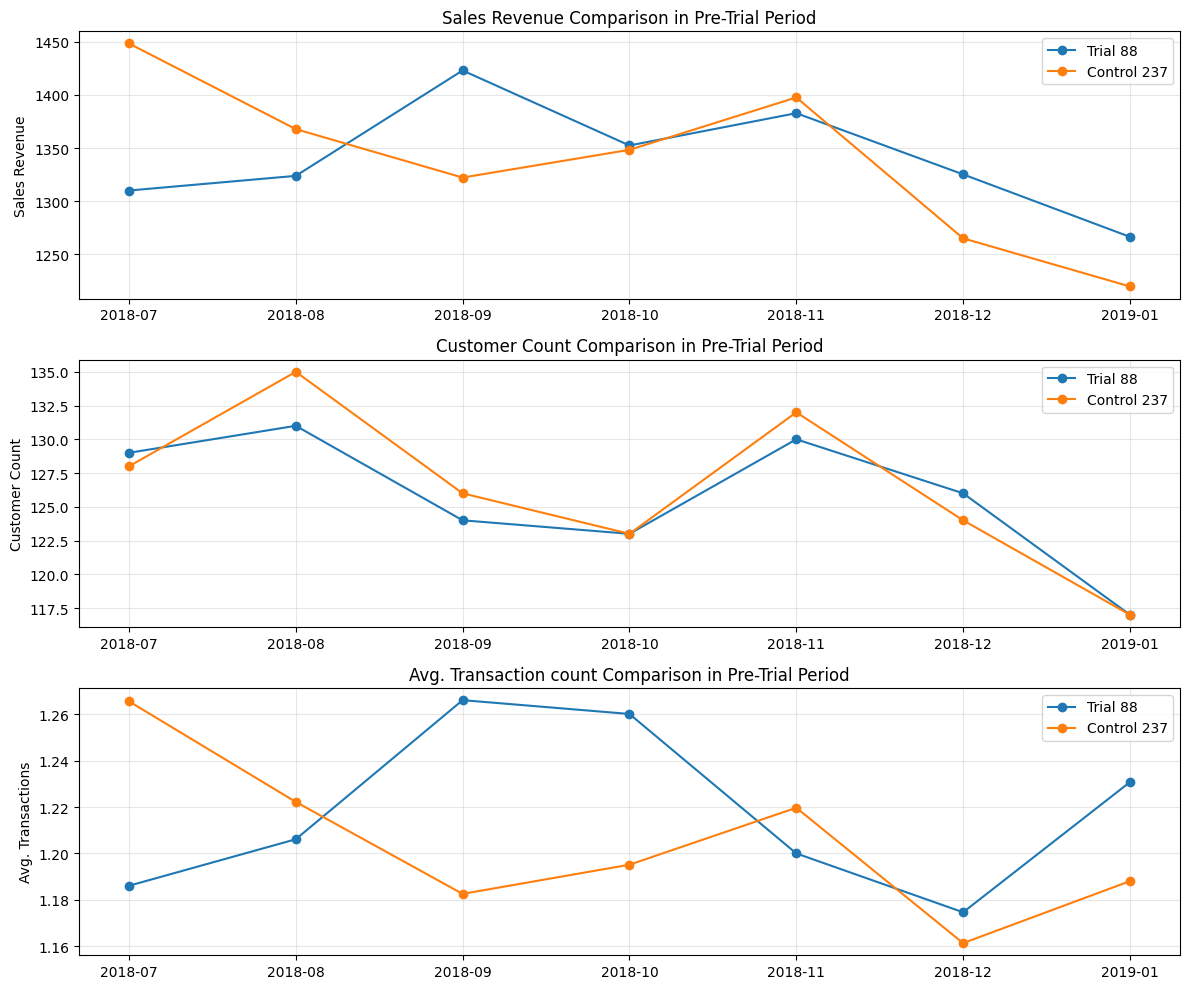

In [50]:
def validate_store(trial, control, data):

    control_data = data[data['STORE_NBR'] == control].sort_values('YEAR_MONTH')
    trial_data = data[data['STORE_NBR'] == trial].sort_values('YEAR_MONTH')

    fig, axes = plt.subplots(3,1, figsize=(12,10))
    months = trial_data['YEAR_MONTH'].astype(str)

    #sales data checking
    axes[0].plot(months, trial_data['SALES_REVENUE'], 'o-', label=f'Trial {trial}')
    axes[0].plot(months, control_data['SALES_REVENUE'], 'o-', label=f'Control {control}')
    axes[0].set_ylabel('Sales Revenue')
    axes[0].set_title('Sales Revenue Comparison in Pre-Trial Period')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    #customer count checking
    axes[1].plot(months, trial_data['CUSTOMER_COUNT'], 'o-', label=f'Trial {trial}')
    axes[1].plot(months, control_data['CUSTOMER_COUNT'], 'o-', label=f'Control {control}')
    axes[1].set_ylabel('Customer Count')
    axes[1].set_title('Customer Count Comparison in Pre-Trial Period')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    #daily transactions checking
    axes[2].plot(months, trial_data['TXN_PER_CUSTOMER'], 'o-', label=f'Trial {trial}')
    axes[2].plot(months, control_data['TXN_PER_CUSTOMER'], 'o-', label=f'Control {control}')
    axes[2].set_ylabel('Avg. Transactions')
    axes[2].set_title('Avg. Transaction count Comparison in Pre-Trial Period')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


validate_store(77, 17, pre_trial_data)
validate_store(86, 138, pre_trial_data)
validate_store(88, 237, pre_trial_data)